In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Embedding, TimeDistributed
from keras.initializers import RandomNormal
# from keras.layers import Conv1D, MaxPooling2D
import warnings
import pickle
warnings.filterwarnings("ignore")

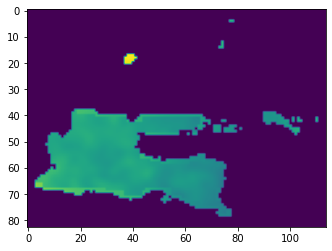

In [86]:
pickle_in = open("../Data_error/error_flatten.pickle","rb")
# data diload sudah dalam bentuk 1D
X = pickle.load(pickle_in)
# untuk menampilkan gambar data 1D -> 2D
plt.imshow(X[0].reshape(83,114))

In [87]:
np.array(X).shape

(396, 9462)

In [88]:
df = X
data_1 = df[:-48]
data_2 = df[:-36]
data_3 = df[:-24]
data_4 = df[:-12]
data_5 = df
# data tahun 1983-2011
df=df[:-60]

In [89]:
# train -> data 1983-2011
train, test = df[-120:], df[-24:]

In [90]:
np.array(train).shape[0]/12

10.0

In [91]:
scaler = MinMaxScaler()
scaler.fit(train)
scaler.fit(data_4)
scaler.fit(test)
train = scaler.transform(train)
data_4 = scaler.transform(data_4)
test = scaler.transform(test)

In [92]:
n_input = 12
n_features = 9462
batch_size=12
# supervised data
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_size)
validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=batch_size)

In [93]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
model = Sequential()
model.add(LSTM(10, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(20, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(30, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(40, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(60, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(n_features, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 12, 10)            378920    
_________________________________________________________________
lstm_10 (LSTM)               (None, 12, 20)            2480      
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 20)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 30)                6120      
_________________________________________________________________
dropout_16 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 40)                1240      
_________________________________________________________________
dropout_17 (Dropout)         (None, 40)               

In [95]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
9/9 [==============================] - 2s 271ms/step - loss: 0.4534 - mean_absolute_error: 0.4534
Epoch 2/90
9/9 [==============================] - 0s 33ms/step - loss: 0.3868 - mean_absolute_error: 0.3868
Epoch 3/90
9/9 [==============================] - 0s 32ms/step - loss: 0.3076 - mean_absolute_error: 0.3076
Epoch 4/90
9/9 [==============================] - 0s 34ms/step - loss: 0.2259 - mean_absolute_error: 0.2259
Epoch 5/90
9/9 [==============================] - 0s 32ms/step - loss: 0.1602 - mean_absolute_error: 0.1602
Epoch 6/90
9/9 [==============================] - 0s 34ms/step - loss: 0.1112 - mean_absolute_error: 0.1112
Epoch 7/90
9/9 [==============================] - 0s 33ms/step - loss: 0.0853 - mean_absolute_error: 0.0853
Epoch 8/90
9/9 [==============================] - 0s 34ms/step - loss: 0.0694 - mean_absolute_error: 0.0694
Epoch 9/90
9/9 [==============================] - 0s 33ms/step - loss: 0.0637 - mean_absolute_error: 0.0637
Epoch 10/90
9/9 [==========

9/9 [==============================] - 0s 35ms/step - loss: 0.0362 - mean_absolute_error: 0.0362
Epoch 77/90
9/9 [==============================] - 0s 33ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 78/90
9/9 [==============================] - 0s 34ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 79/90
9/9 [==============================] - 0s 34ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 80/90
9/9 [==============================] - 0s 32ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 81/90
9/9 [==============================] - 0s 35ms/step - loss: 0.0359 - mean_absolute_error: 0.0359
Epoch 82/90
9/9 [==============================] - 0s 33ms/step - loss: 0.0358 - mean_absolute_error: 0.0358
Epoch 83/90
9/9 [==============================] - 0s 34ms/step - loss: 0.0360 - mean_absolute_error: 0.0360
Epoch 84/90
9/9 [==============================] - 0s 33ms/step - loss: 0.0359 - mean_absolute_error: 0.0359
Epoch 85/90
9/9 [==============

In [96]:
model.evaluate_generator(validation_sequence)

[0.04448046162724495, 0.04448046]

In [97]:
pred_list = []

batch = train[-12:].reshape((1, n_input, n_features))
batch

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [98]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list = scaler.inverse_transform(pred_list)

# prediksi = (model.predict(batch)[0])

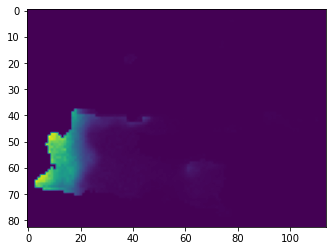

In [99]:
plt.imshow(pred_list[0].reshape(83,114))

In [100]:
train = df
test = df[-24:]

In [101]:
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)

In [102]:
n_input = 12
n_features = 9462
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=12)
validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=12)

In [103]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
27/27 [==============================] - 1s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214
Epoch 2/90
27/27 [==============================] - 1s 31ms/step - loss: 0.0212 - mean_absolute_error: 0.0212
Epoch 3/90
27/27 [==============================] - 1s 31ms/step - loss: 0.0211 - mean_absolute_error: 0.0211
Epoch 4/90
27/27 [==============================] - 1s 31ms/step - loss: 0.0211 - mean_absolute_error: 0.0211
Epoch 5/90
27/27 [==============================] - 1s 35ms/step - loss: 0.0211 - mean_absolute_error: 0.0211
Epoch 6/90
27/27 [==============================] - 1s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210
Epoch 7/90
27/27 [==============================] - 1s 33ms/step - loss: 0.0210 - mean_absolute_error: 0.0210
Epoch 8/90
27/27 [==============================] - 1s 32ms/step - loss: 0.0211 - mean_absolute_error: 0.0211
Epoch 9/90
27/27 [==============================] - 1s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209
Epoch 10/9

27/27 [==============================] - 1s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 75/90
27/27 [==============================] - 1s 31ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 76/90
27/27 [==============================] - 1s 31ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 77/90
27/27 [==============================] - 1s 31ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 78/90
27/27 [==============================] - 1s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 79/90
27/27 [==============================] - 1s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 80/90
27/27 [==============================] - 1s 35ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 81/90
27/27 [==============================] - 1s 33ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 82/90
27/27 [==============================] - 1s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 83/90
2

In [104]:
model.evaluate_generator(validation_sequence)

[0.04403593763709068, 0.044035938]

In [105]:
pred_list = []

batch = data_4[-60:-48].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch1 = data_4[-48:-36].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch1)[0]) 
    batch1 = np.append(batch1[:,1:,:],[[pred_list[i]]],axis=1)
    
batch2 = data_4[-36:-24].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch2)[0]) 
    batch2 = np.append(batch2[:,1:,:],[[pred_list[i]]],axis=1)
    
# data tahun 2014 untuk memprediksi tahun 2015
batch3 = data_4[-24:-12].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch3)[0]) 
    batch3 = np.append(batch3[:,1:,:],[[pred_list[i]]],axis=1)

# data tahun 2015 untuk memprediksi tahun 2016
batch4 = data_4[-12:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch4)[0]) 
    batch4 = np.append(batch4[:,1:,:],[[pred_list[i]]],axis=1)

In [106]:
batch

array([[[6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
         6.23060550e-05, 6.36571131e-05, 6.60833975e-05],
        [6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
         6.23060550e-05, 6.36571131e-05, 6.60833975e-05],
        [6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
         6.23060550e-05, 6.36571131e-05, 6.60833975e-05],
        ...,
        [6.45896216e-05, 6.47877605e-05, 6.65071566e-05, ...,
         6.41531733e-05, 6.55247204e-05, 6.80263329e-05],
        [6.45656619e-05, 6.47637935e-05, 6.64823019e-05, ...,
         6.41293736e-05, 6.55004187e-05, 6.80010999e-05],
        [6.44750908e-05, 6.46731933e-05, 6.63899264e-05, ...,
         6.40390499e-05, 6.54091637e-05, 6.79060322e-05]]])

In [107]:
pred_list = scaler.inverse_transform(pred_list)
pred_list

array([[6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05],
       [6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05],
       [6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05],
       ...,
       [6.27374757e-05, 6.29326896e-05, 6.46136468e-05, ...,
        6.23061133e-05, 6.36572368e-05, 6.60834557e-05],
       [6.27374102e-05, 6.29326314e-05, 6.46136468e-05, ...,
        6.23060550e-05, 6.36571713e-05, 6.60833975e-05],
       [6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05]])

In [108]:
pred_list.shape

(60, 9462)

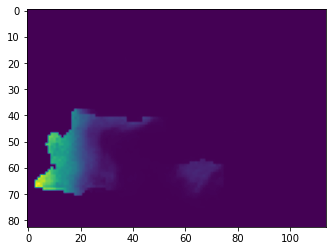

In [109]:
plt.imshow(pred_list[59].reshape(83,114))

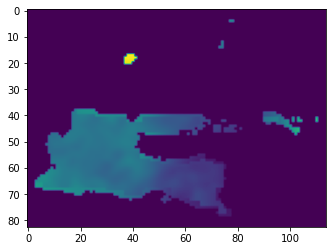

In [110]:
df_asli = X[-60:]
plt.imshow(df_asli[0].reshape(83,114))

In [111]:
max(pred_list[10])

0.09475121418344301

In [112]:
max(df_asli[10])

0.0

In [113]:
# MAE untuk semua data
pred_list[pred_list<0]=0
pred_list_new=[]
df_asli_new=[]
no=0
df_asli=np.array(df_asli)
# for pred in pred_list:
#     pred_list_new.append(list(filter(lambda x: x != 0, pred_list[no])))
#     df_asli_new.append(list(filter(lambda x: x != 0, df_asli[no])))
#     no+=1
    
pred_list_new=np.array(pred_list_new)
df_asli_new=np.array(df_asli_new)

# pred_list.shape
# np.array(df_asli_new).shape

mae=[]
no=0
# for pred1 in pred_list:
#     mae_ = df_asli[no]-pred1
#     mae_ = np.average(mae_)
#     mae.append(mae_)
#     no+=1
from sklearn.metrics import mean_absolute_error
for pred1 in pred_list:
    mae_ = mean_absolute_error(df_asli[no], pred1)
    mae.append(mae_)
    no+=1

In [114]:
sae=[]
no=0

for pred1 in pred_list:
    sae_ = df_asli[no]-pred1
    sae_ = np.abs(sae_)
    sae.append(sae_)
    no+=1

In [115]:
mae

[0.04806602914664172,
 0.027113212191975516,
 0.05331779800243078,
 0.0023969818262725507,
 0.0023969818262725507,
 0.0019178425132739083,
 0.003503307102829662,
 0.020914647275146428,
 0.07253608676250482,
 0.004150665105421426,
 0.0024207965532910317,
 0.0024203818686142813,
 0.06689362678111369,
 0.04249403512691631,
 0.06621681733767819,
 0.0023969818262725507,
 0.0023969818262725507,
 0.0014569759224722996,
 0.0038714564410607857,
 0.02466986692696695,
 0.07151938999133757,
 0.0034635462711723273,
 0.002420796679779943,
 0.0024196273505990517,
 0.04137687260813664,
 0.016727517796211094,
 0.03930850955337374,
 0.0023969818262725507,
 0.0023969818262725507,
 0.001994210036728001,
 0.004523415562229137,
 0.0180085713620014,
 0.07249622951745269,
 0.0035649526203945857,
 0.0024207965532910317,
 0.002427051376546375,
 0.0024888289032583767,
 0.0023969818262725507,
 0.0023969818262725507,
 0.0023969818262725507,
 0.0023969818262725507,
 0.0023969818262725507,
 0.009804190099440406,
 0.

In [116]:
sum(mae)/60

0.02057345989505912

In [117]:
sae

[array([6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05]),
 array([6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05]),
 array([6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05]),
 array([6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05]),
 array([6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05]),
 array([6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05]),
 array([6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05]),
 array([6.27374102e-05, 6.29326314e-05, 6.46135813e-05, ...,
        6.23060550e-05, 6.36571131e-05, 6.60833975e-05]),
 array([6.27374102e-05, 6.29326314e-05, 6.461358

In [118]:
sae_ = sum(sae)/60
sae_ = np.sum(sae_)
sae_

194.6660775270493

In [31]:
# pred_list_new

Pred_rata= []
for i in range(0,60):
	Pred_rata.append((pred_list[i].mean()))


In [32]:
df_asli_rata= []
for i in range(0,60):
	df_asli_rata.append((df_asli[i].mean()))

In [33]:
Pred_rata

[0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024480937494316905,
 0.002449197812970371,
 0.002449242422035398,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024663972194014926,
 0.002466249593303063,
 0.0024656653046057405,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024480212905038973,
 0.002448700004747854,
 0.0024491184020638806,
 0.002449243253537871,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024663877462136547,
 0.00246624941649793,
 0.0024656651635433023,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024480296443472284,
 0.0024488090391948823,
 0.0024491625339970323,
 0.0024492433430216825,
 0.0024492434519973443,
 0.0024492434519973443,
 0.0024665402474865644,
 0.002466249593303063,
 0.0024656653046057405,
 0.0024492434519973443,
 0.0024492427277928884,
 0.002449239689221592,
 0.0024480185881953806,
 0.002448643398382706,
 0.0024491444279188907,
 0

In [34]:
df_asli_rata


[0.050361443,
 0.029394211,
 0.055611517,
 0.0,
 0.0,
 0.00049859984,
 0.0047321394,
 0.023135662,
 0.07482821,
 0.0019517558,
 0.0,
 8.443186e-07,
 0.069189034,
 0.04478209,
 0.068511695,
 0.0,
 0.0,
 0.0015270336,
 0.005131007,
 0.026906889,
 0.073812164,
 0.0012374661,
 0.0,
 0.0,
 0.04367229,
 0.018763991,
 0.041600674,
 0.0,
 0.0,
 0.000423101,
 0.0060387095,
 0.020210369,
 0.0747887,
 0.0013435925,
 0.0,
 7.588192e-06,
 9.328075e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01143431,
 0.0050058723,
 0.08076222,
 0.0026893893,
 0.0,
 0.019596733,
 0.10007225,
 0.06660953,
 0.087180346,
 0.0,
 0.0,
 0.0012253057,
 0.004553074,
 0.030833978,
 0.07168045,
 0.00053633633,
 0.0,
 0.0]

In [35]:
# membuat index tanggal, agar mempudah dalam proses plotting data
awal = "2012-1"
awal = pd.to_datetime(awal)
from pandas.tseries.offsets import DateOffset
add_dates = [awal + DateOffset(months=x) for x in range(0,60) ]
add_dates

[Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-02-01 00:00:00'),
 Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-06-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2012-08-01 00:00:00'),
 Timestamp('2012-09-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2012-11-01 00:00:00'),
 Timestamp('2012-12-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-03-01 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-05-01 00:00:00'),
 Timestamp('2013-06-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-05-

In [36]:
len(add_dates)


60

In [37]:
len(Pred_rata)


60

In [38]:
len(df_asli_rata)

60

In [39]:
dict = {'bulan': add_dates, 'data ':mae}
df = pd.DataFrame(dict)

In [40]:
df

,bulan,data
0,2012-01-01,0.047951
1,2012-02-01,0.026991
2,2012-03-01,0.053202
3,2012-04-01,0.002448
4,2012-05-01,0.002449
5,2012-06-01,0.001956
6,2012-07-01,0.003324
7,2012-08-01,0.020770
8,2012-09-01,0.072419
9,2012-10-01,0.004228


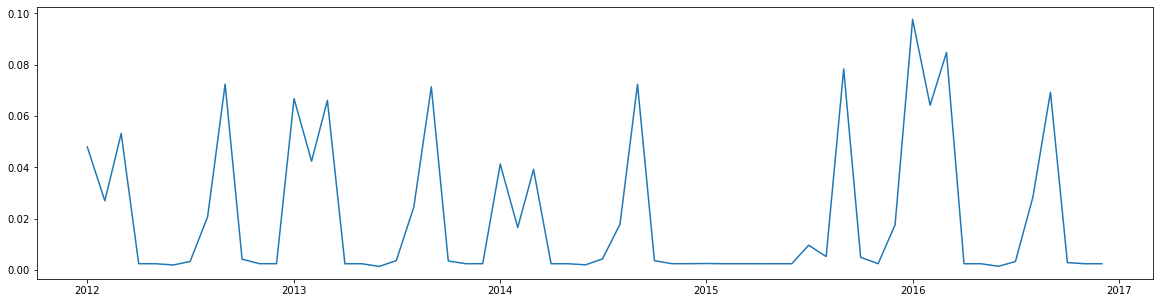

In [41]:
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index,df)

In [42]:
dict = {'bulan': add_dates, 'data prediksi':Pred_rata, 'data asli':df_asli_rata}
df = pd.DataFrame(dict)
df


,bulan,data prediksi,data asli
0,2012-01-01,0.002449,5.036144e-02
1,2012-02-01,0.002449,2.939421e-02
2,2012-03-01,0.002449,5.561152e-02
3,2012-04-01,0.002448,0.000000e+00
4,2012-05-01,0.002449,0.000000e+00
5,2012-06-01,0.002449,4.985998e-04
6,2012-07-01,0.002449,4.732139e-03
7,2012-08-01,0.002449,2.313566e-02
8,2012-09-01,0.002449,7.482821e-02
9,2012-10-01,0.002466,1.951756e-03


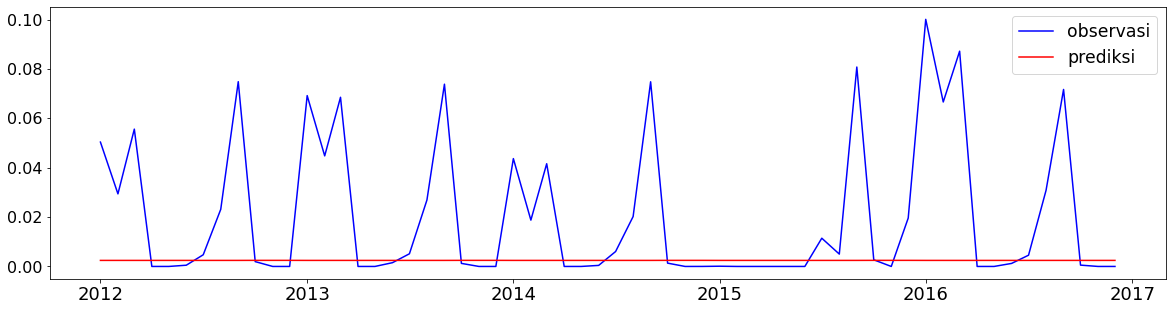

In [43]:
# df_asli = data_4
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index, df_asli_rata[-60:], color='b', label="observasi")
plt.plot(df.index, Pred_rata[-60:], color='r', label="prediksi")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

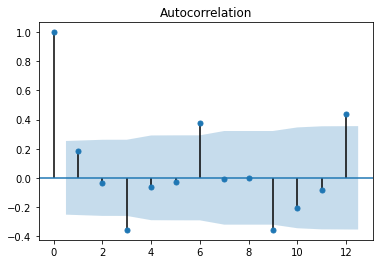

In [44]:
# # Time series data

# data = mae

 

# # Plot autocorrelation

# plt.acorr(data, maxlags=12)

 

# # Add labels to autocorrelation plot

# plt.title('Autocorrelation of LSTM')

# plt.xlabel('Lag')

# plt.ylabel('Autocorrelation')

 

# # Display the autocorrelation plot

# plt.show()

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(mae, lags=12 , alpha=0.05)
acf.show()

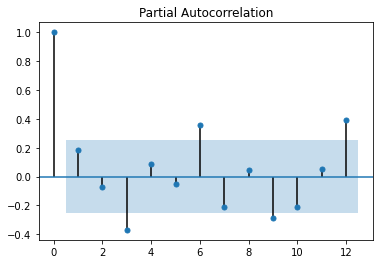

In [45]:
pacf = smt.graphics.plot_pacf(mae, lags=12 , alpha=0.05)
pacf.show()

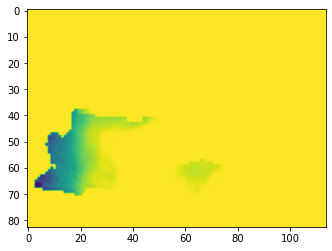

In [46]:
plt.imshow((df_asli[59]-pred_list[59]).reshape(83,114))

In [47]:
sum(mae)/60

0.020538477584126285

In [48]:
from skimage import io
# io.imsave('NewRaster/201201.tif', pred_list[0].reshape(83,114))

In [49]:
pred_list[pred_list==0]=-9999

In [50]:
no=0
for pred in pred_list:
    if(add_dates[no].month<10):
        nama_file = 'Raster_1/'+str(add_dates[no].year)+'0'+str(add_dates[no].month)+'.tif'
    else:
        nama_file = 'Raster_1/'+str(add_dates[no].year)+str(add_dates[no].month)+'.tif'
            
    io.imsave(nama_file, pred_list[no].reshape(83,114))
    no+=1
nama_file

'Raster_1/201612.tif'

In [51]:
model.save('LSTM102030DENSE405060_adam_seed1.h5')